## [Problem 1] Scratch of train_test_split​


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,precision_score, recall_score,f1_score, confusion_matrix

In [78]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.

    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)

    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    #melanger X et y array 
    np.random.seed(seed=0)
    np.random.shuffle(X)
    
    np.random.seed(seed=0)
    np.random.shuffle(y)
    
    #trouver le split
    split = int(train_size*len(X))

    X_train = X[:split]
    y_train = y[:split]
    X_test =  X[split:]
    y_test = y[split:]

    return X_train, X_test, y_train, y_test

## [Problem 2] Creating a code to solve the classification problem

#### Donnee iris

In [87]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
iris["species"] = iris_data.target

iris = iris.loc[iris["species"] !=0]

X1 = iris.drop(["species"], axis=1)
y1 = iris["species"]

X1_train, X1_test, y1_train, y1_test = scratch_train_test_split(X1.to_numpy(), y1.to_numpy(), train_size=0.8)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


####  jeu de données simple 1

In [88]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X2 = np.concatenate([f0, f1])
y2 = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])


X2_train, X2_test, y2_train, y2_test = scratch_train_test_split(X2, y2, train_size=0.8)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(400, 2)
(400,)
(100, 2)
(100,)


####  jeu de données simple 2

In [89]:
X3 = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X3_train, X3_test, y3_train, y3_test = scratch_train_test_split(X3, y3, train_size=0.8)

print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)


(32, 2)
(32,)
(8, 2)
(8,)


### Régression logistique

Score de precision: 0.9545454545454546


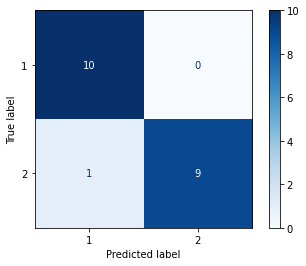

In [82]:
#iris data 1
clf = LogisticRegression(random_state=0)
clf.fit(X1_train,y1_train)
clf_pred = clf.predict(X1_test)
print("Score de precision: {}".format(precision_score(y1_test,clf_pred, average='macro')))
plot_confusion_matrix(clf, X1_test, y1_test, cmap=plt.cm.Blues);

Score de precision: 1.0


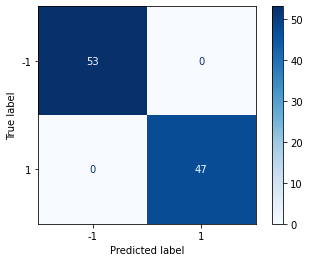

In [90]:
#sample data 1
clf2 = LogisticRegression(random_state=0)
clf2.fit(X2_train,y2_train)
clf2_pred = clf2.predict(X2_test)
print("Score de precision: {}".format(precision_score(y2_test,clf2_pred, average='macro')))
plot_confusion_matrix(clf2, X2_test, y2_test, cmap=plt.cm.Blues);

Score de precision: 0.9166666666666667


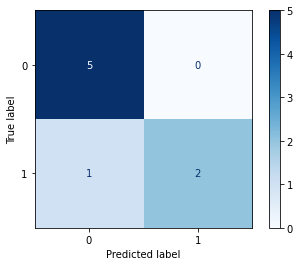

In [91]:
#sample data 2
clf3 = LogisticRegression(random_state=0)
clf3.fit(X3_train,y3_train)
clf3_pred = clf3.predict(X3_test)
print("Score de precision: {}".format(precision_score(y3_test,clf3_pred, average='macro')))
plot_confusion_matrix(clf3, X3_test, y3_test, cmap=plt.cm.Blues);

### SGC model

Score de precision: 0.7941176470588236


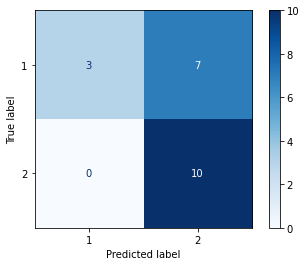

In [92]:
#iris data
sgd1 = SGDClassifier(loss='log')
sgd1.fit(X1_train,y1_train)
sgd1_pred = sgd1.predict(X1_test)
print("Score de precision: {}".format(precision_score(y1_test,sgd1_pred, average='macro')))
plot_confusion_matrix(sgd1, X1_test, y1_test, cmap=plt.cm.Blues);

Score de precision: 1.0


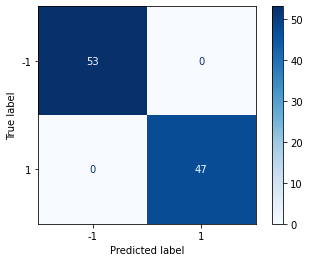

In [94]:
# data sample 1
sgd2 = SGDClassifier(loss='log')
sgd2.fit(X2_train,y2_train)
sgd2_pred = sgd2.predict(X2_test)
print("Score de precision: {}".format(precision_score(y2_test,sgd2_pred, average='macro')))
plot_confusion_matrix(sgd2, X2_test, y2_test, cmap=plt.cm.Blues);

Score de precision: 0.41666666666666663


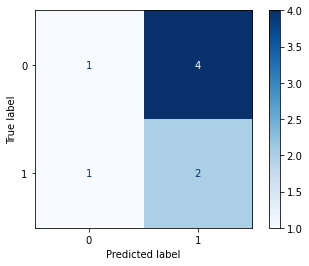

In [95]:
# data sample 2
sgd3 = SGDClassifier(loss='log')
sgd3.fit(X3_train,y3_train)
sgd3_pred = sgd3.predict(X3_test)
print("Score de precision: {}".format(precision_score(y3_test,sgd3_pred, average='macro')))
plot_confusion_matrix(sgd3, X3_test, y3_test, cmap=plt.cm.Blues);

### SVC

Score de precision: 0.9545454545454546


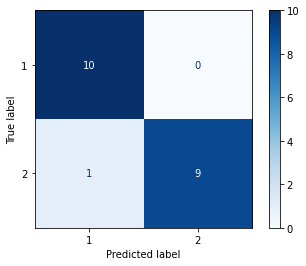

In [96]:
# data iris
svc1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc1.fit(X1_train,y1_train)
svc1_pred = svc1.predict(X1_test)
print("Score de precision: {}".format(precision_score(y1_test,svc1_pred, average='macro')))
plot_confusion_matrix(svc1, X1_test, y1_test, cmap=plt.cm.Blues);

Score de precision: 1.0


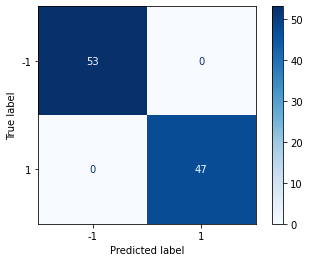

In [100]:
#data sample 1
svc2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc2.fit(X2_train,y2_train)
svc2_pred = svc2.predict(X2_test)
print("Score de precision: {}".format(precision_score(y2_test,svc2_pred, average='macro')))
plot_confusion_matrix(svc2, X2_test, y2_test, cmap=plt.cm.Blues);

Score de precision: 0.4666666666666667


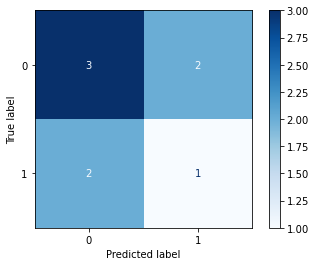

In [101]:
#data sample 2
svc3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc3.fit(X3_train,y3_train)
svc3_pred = svc3.predict(X3_test)
print("Score de precision: {}".format(precision_score(y3_test,svc3_pred, average='macro')))
plot_confusion_matrix(svc3, X3_test, y3_test, cmap=plt.cm.Blues);

### Tree of decision

Score de precision: 0.9166666666666667


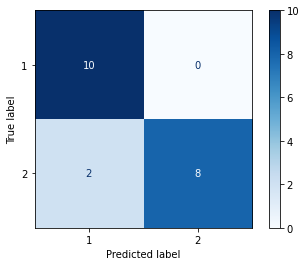

In [102]:
#data iris
tdc1 = DecisionTreeClassifier(random_state=0)
tdc1.fit(X1_train,y1_train)
tdc1_pred = tdc1.predict(X1_test)
print("Score de precision: {}".format(precision_score(y1_test,tdc1_pred, average='macro')))
plot_confusion_matrix(tdc1, X1_test, y1_test, cmap=plt.cm.Blues);

Score de precision: 1.0


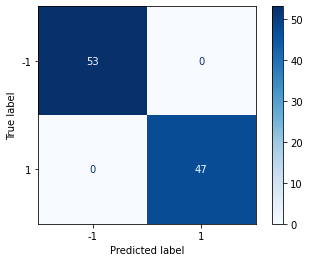

In [104]:
#data sample 1
tdc2 = DecisionTreeClassifier(random_state=0)
tdc2.fit(X2_train,y2_train)
tdc2_pred = tdc2.predict(X2_test)
print("Score de precision: {}".format(precision_score(y2_test,tdc2_pred, average='macro')))
plot_confusion_matrix(tdc2, X2_test, y2_test, cmap=plt.cm.Blues);

Score de precision: 1.0


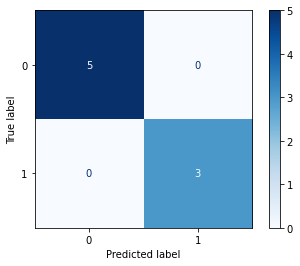

In [105]:
#data sample 2
tdc3 = DecisionTreeClassifier(random_state=0)
tdc3.fit(X3_train,y3_train)
tdc3_pred = tdc3.predict(X3_test)
print("Score de precision: {}".format(precision_score(y3_test,tdc3_pred, average='macro')))
plot_confusion_matrix(tdc3, X3_test, y3_test, cmap=plt.cm.Blues);

## [Problem 3] Creating a code to solve the regression problem

In [132]:
import pandas as pd
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = data[["GrLivArea","YearBuilt","SalePrice"]]
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [133]:
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

Nous voyons que les données sont propres.

In [134]:
X = df.loc[:,["GrLivArea", "YearBuilt"]]
y = df.loc[:,["SalePrice"]]

In [135]:
# split train and test
X_train, X_test, y_train, y_test = scratch_train_test_split(X.to_numpy(), y.to_numpy(), train_size=0.8)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 2)
(1168, 1)
(292, 2)
(292, 1)


In [136]:
#model and train
rng = SGDRegressor()
rng.fit(X_train,y_train)
rng_pred = rng.predict(X_test)
print("Score : {}".format(rng.score(X_test,rng_pred)))

Score : 1.0


/Users/apple/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [139]:
data_test = test.loc[:,["GrLivArea", "YearBuilt"]]
ids = test['Id']

saleprice_predicted = rng.predict(data_test)

submission = pd.DataFrame({'Id': ids, 'SalePrice': saleprice_predicted})
submission.to_csv("./submission.csv", index=False)